In [1]:
import numpy as np
np.random.seed(1337)
import datetime
from IPython.display import SVG
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from livelossplot.keras import PlotLossesCallback
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='ticks')
sns.set_palette('husl')
from tensorflow.python.keras.callbacks import TensorBoard
import talos as ta

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [3]:
df = pd.read_csv(
    'iris.csv',
    header = None,
    names  = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)
df.head()

df['labels'] = df['species'].astype('category').cat.codes
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['labels']
# Convert class vectors to binary class matrices using 1 hot encoding.
# 0 ---> 1, 0, 0
# 1 ---> 0, 1, 0
# 2 ---> 0, 0, 1
num_classes = len(y.unique())
y = keras.utils.to_categorical(y, len(y.unique()))

x = np.asarray(x)
y = np.asarray(y)

x = x.reshape(len(x), 4, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True)

In [4]:
model = Sequential()
model.add(Conv1D(32, (3), input_shape=(4, 1), activation='tanh'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(100,                            activation='tanh'))
model.add(Dense(num_classes,                    activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 3,731
Trainable params: 3,731
Non-trainable params: 0
_________________________________________________________________


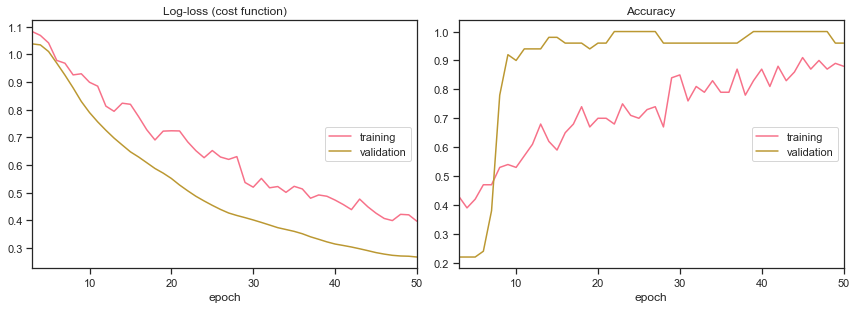

Log-loss (cost function):
training   (min:    0.396, max:    1.225, cur:    0.396)
validation (min:    0.267, max:    1.038, cur:    0.267)

Accuracy:
training   (min:    0.300, max:    0.910, cur:    0.880)
validation (min:    0.220, max:    1.000, cur:    0.960)


In [5]:
model.fit(
    x_train,
    y_train,
    batch_size      = 64,
    epochs          = 50,
    verbose         = False,
    validation_data = (x_test, y_test),
    callbacks       = [PlotLossesCallback()]
);

In [6]:
tensorboard = TensorBoard(log_dir=f'/tmp/tensorboard/{datetime.datetime.utcnow().strftime("%Y-%m-%dT%H%M%SZ")}')
# tensorboard --logdir=/tmp/tensorboard
# localhost:6006

In [7]:
model.fit(
    x_train,
    y_train,
    batch_size      = 64,
    epochs          = 5,
    verbose         = False,
    validation_data = (x_test, y_test),
    callbacks       = [tensorboard]
);